In [36]:
# Src:
# http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%202%20-%20Selecting%20data%20&%20finding%20the%20most%20common%20complaint%20type.ipynb
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [7]:
url = "311-service-requests.csv"
complaints = pd.read_csv(url)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
complaints

Unique Key            Created Date             Closed Date Agency                              Agency Name            Complaint Type                                    Descriptor                  Location Type Incident Zip           Incident Address           Street Name      Cross Street 1                    Cross Street 2   Intersection Street 1 Intersection Street 2  Address Type                 City Landmark Facility Type    Status                Due Date Resolution Action Updated Date       Community Board        Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name   Park Borough  School Name School Number School Region  School Code School Phone Number                                     School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0         26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department   Noise - Street/Sidewalk                                  Loud Talking                Street/Sidewalk        11432           90-03 169 STREET            169 STREET           90 AVENUE                         91 AVENUE                     NaN                   NaN       ADDRESS              JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM             12 QUEENS         QUEENS                   1042027.0                    197389.0        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                        Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1         26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department           Illegal Parking                  Commercial Overnight Parking                Street/Sidewalk        11378                  58 AVENUE             58 AVENUE            58 PLACE                         59 STREET                     NaN                   NaN     BLOCKFACE              MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN             05 QUEENS         QUEENS                   1009349.0                    201984.0        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                        Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2         26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department        Noise - Commercial                              Loud Music/Party            Club/Bar/Restaurant        10032              4060 BROADWAY              BROADWAY     WEST 171 STREET                   WEST 172 STREET                     NaN                   NaN       ADDRESS             NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM          12 MANHATTAN      MANHATTAN                   1001088.0                    246531.0        Unspecified      MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                

In [13]:
complaints.head()

Unique Key            Created Date             Closed Date Agency                              Agency Name           Complaint Type                    Descriptor        Location Type Incident Zip  Incident Address      Street Name   Cross Street 1                    Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type      City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board    Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department  Noise - Street/Sidewalk                  Loud Talking      Street/Sidewalk        11432  90-03 169 STREET       169 STREET        90 AVENUE                         91 AVENUE                   NaN                   NaN      ADDRESS   JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM       12 QUEENS     QUEENS                   1042027.0                    197389.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department          Illegal Parking  Commercial Overnight Parking      Street/Sidewalk        11378         58 AVENUE        58 AVENUE         58 PLACE                         59 STREET                   NaN                   NaN    BLOCKFACE   MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN       05 QUEENS     QUEENS                   1009349.0                    201984.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department       Noise - Commercial              Loud Music/Party  Club/Bar/Restaurant        10032     4060 BROADWAY         BROADWAY  WEST 171 STREET                   WEST 172 STREET                   NaN                   NaN      ADDRESS  NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM    12 MANHATTAN  MANHATTAN                   1001088.0                    246531.0        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.843330 -73.939144   (40.84332975466513, -73.93914371913482)
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD          New Y

In [17]:
complaints['Complaint Type'].value_counts()[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

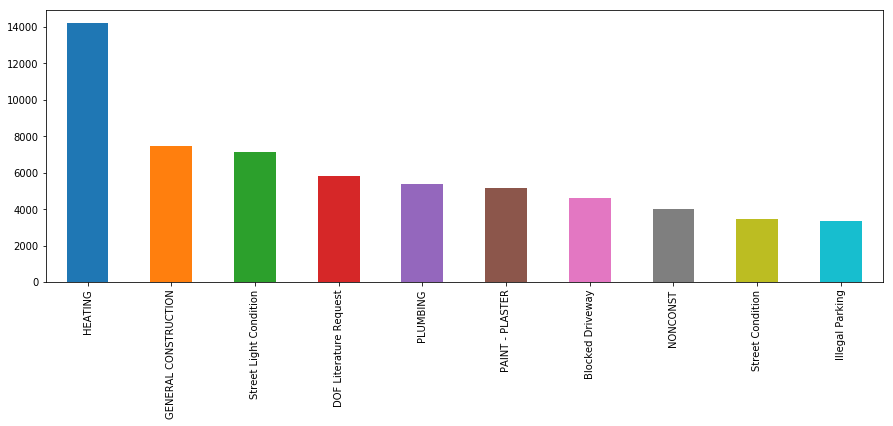

In [19]:
complaints['Complaint Type'].value_counts()[:10].plot(kind='bar')

In [22]:
# which borough has the most noise complaints?
noise_complaints = complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
noise_complaints[:3]

Unique Key            Created Date             Closed Date Agency                      Agency Name           Complaint Type        Descriptor    Location Type Incident Zip     Incident Address      Street Name    Cross Street 1 Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type           City Landmark Facility Type    Status                Due Date Resolution Action Updated Date   Community Board        Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name   Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                 Location
0     26589651  10/31/2013 02:08:41 AM                     NaN   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        11432     90-03 169 STREET       169 STREET         90 AVENUE      91 AVENUE                   NaN                   NaN      ADDRESS        JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM         12 QUEENS         QUEENS                   1042027.0                    197389.0        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604  (40.70827532593202, -73.79160395779721)
16    26594086  10/31/2013 12:54:03 AM  10/31/2013 02:16:39 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party  Street/Sidewalk        10310  173 CAMPBELL AVENUE  CAMPBELL AVENUE  HENDERSON AVENUE   WINEGAR LANE                   NaN                   NaN      ADDRESS  STATEN ISLAND      NaN      Precinct    Closed  10/31/2013 08:54:03 AM         10/31/2013 02:07:14 AM  01 STATEN ISLAND  STATEN ISLAND                    952013.0                    171076.0        Unspecified  STATEN ISLAND  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.636182 -74.116150   (40.63618202176914, -74.1161500428337)
25    26591573  10/31/2013 12:35:18 AM  10/31/2013 02:41:35 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        10312    24 PRINCETON LANE   PRINCETON LANE     HAMPTON GREEN       DEAD END                   NaN                   NaN      ADDRESS  STATEN ISLAND      NaN      Precinct    Closed  10/31/2013 08:35:18 AM         10/31/2013 01:45:17 AM  03 STATEN ISLAND  STATEN ISLAND                    929577.0                    140964.0        Unspecified  STATEN ISLAND  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.553421 -74.196743  (40.55342078716953, -74.19674315017886)

In [25]:
complaints['Complaint Type'] == 'Noise - Street/Sidewalk'

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Le

In [35]:
is_noise = complaints['Complaint Type'] == 'Noise - Street/Sidewalk'
in_brooklyn = complaints['Borough'] == 'BROOKLYN'
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:4]

Complaint Type   Borough            Created Date        Descriptor
31   Noise - Street/Sidewalk  BROOKLYN  10/31/2013 12:30:36 AM  Loud Music/Party
49   Noise - Street/Sidewalk  BROOKLYN  10/31/2013 12:05:10 AM      Loud Talking
109  Noise - Street/Sidewalk  BROOKLYN  10/30/2013 11:26:32 PM  Loud Music/Party
236  Noise - Street/Sidewalk  BROOKLYN  10/30/2013 10:02:58 PM      Loud Talking

In [46]:
# T/F selection works in numpy-arrays as well
a = np.array([1,2,3,4,5,6])
is_even = a % 2 == 0
is_even

array([False,  True, False,  True, False,  True])

In [47]:
a[is_even]

array([2, 4, 6])

In [48]:
a != 3

array([ True,  True, False,  True,  True,  True])

In [50]:
# Most noise complaints?
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [54]:
# noise complaints as a fraction of total num of complaints per Borough
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

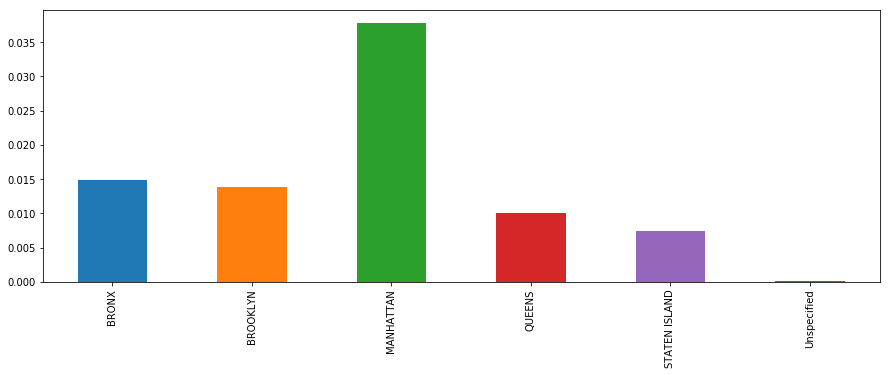

In [57]:
(noise_complaint_counts / complaint_counts).plot(kind='Bar')